In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Creamos un DataFrame de un archivo csv
global_temp = pd.read_csv('GlobalTemperatures.csv')

#Mostramos los primeros 5 elementos del DataFrame para ver que contiene el archivo
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Aplicamos describe() para ver a detalle todo en el DataFrame
global_temp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [44]:
# Aplicamos info() para verificar el tipo de variables y si tenemos valores faltantes
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


### ***Limpieza de datos***

Realizaremos un proceso de limpieza teniendo en cuenta las situaciones mas comunes:

    1. Datos faltantes en algunas celdas
    2. Registros (filas) repetidos
    3. Valores extremos (outliers) en el caso de las variables numericas.
    4. Errores tipograficos


1. Datos faltantes en algunas celdas

In [45]:
# En este caso, solo nos interesa los valos de dt, de la Temperatura promedio Terreste (LandAverageTemperature ) 
# y los valores de la incertidumbre de la Temperatura promedio Terrestre (LandAverageTemperatureUncertainty)

remove_columns= [
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']
#Eliminamos las columnas que no tienen datos relevantes para nosotros
global_temp = global_temp.drop(remove_columns,axis=1)
# Verificamos los cambios
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   dt                                 3192 non-null   object 
 1   LandAverageTemperature             3180 non-null   float64
 2   LandAverageTemperatureUncertainty  3180 non-null   float64
dtypes: float64(2), object(1)
memory usage: 74.9+ KB


In [46]:
# Eliminamos todos los registros con datos nulos ya que contamos con informacion suficiente
global_temp.dropna(inplace=True)
# Cambiamos el nombre de la columna dt por Date
global_temp= global_temp.rename(columns={'dt': 'Date'})
# Verificamos que tenemos la misma cantidad de datos no-null en todas las columnas
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, 0 to 3191
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               3180 non-null   object 
 1   LandAverageTemperature             3180 non-null   float64
 2   LandAverageTemperatureUncertainty  3180 non-null   float64
dtypes: float64(2), object(1)
memory usage: 99.4+ KB


2. Registros (filas) repetidos

In [47]:
# Eliminamos todos los registros repetidos
global_temp.drop_duplicates(inplace=True)
# Verificamos que tenemos la misma cantidad de datos no-null en todas las columnas
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, 0 to 3191
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               3180 non-null   object 
 1   LandAverageTemperature             3180 non-null   float64
 2   LandAverageTemperatureUncertainty  3180 non-null   float64
dtypes: float64(2), object(1)
memory usage: 99.4+ KB


3. Valores extremos (outliers) en el caso de las variables numericas.

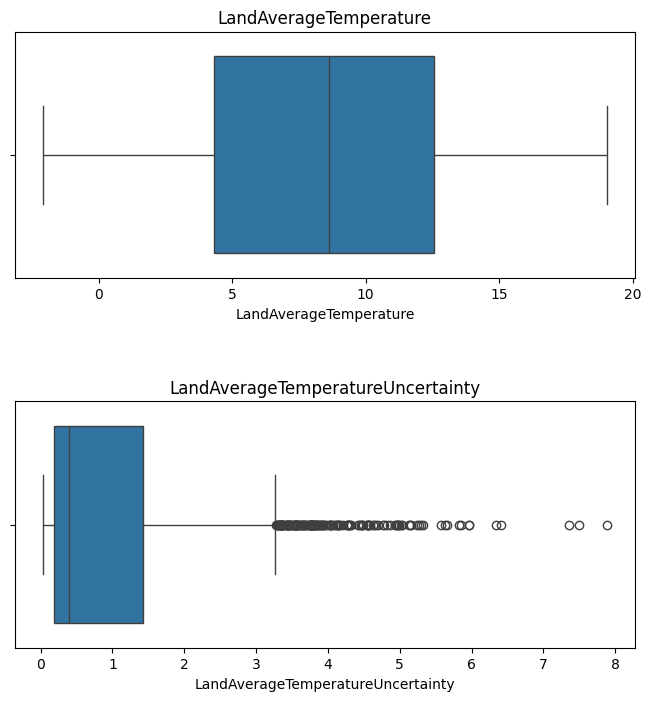

In [48]:
cols_num = ['LandAverageTemperature', 'LandAverageTemperatureUncertainty']

fig, ax = plt.subplots(nrows=2, ncols=1,figsize = (8,8))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(cols_num):
    sns.boxplot(x=col, data=global_temp, ax=ax[i])
    ax[i].set_title(col)

**Observacion:** Comprobamos que no tenemos Outliers, a pesar de que en LandAverageTemperatureUncertainty tiene un valor de casi 8 grados,
no es un valor que esta lejos de la realidad asi que es posible.

4. Errores tipograficos

**Observacion:** Comprobamos que no tenemos datos tipo string, asi que no necesitamos de este analisis

In [51]:
# Creamos una lista de años unicos presentes en la columna 'Date' 
years = np.unique(global_temp['Date'].apply(lambda x: x[:4]))

mean_temp_world = []
mean_temp_world_uncertainty = []

# Filtramos las filas del DataFrame donde los primeros cuatro caracteres de la columna 'Date' son iguales al año actual en la iteración.
# Se calcula la media de la columna 'LandAverageTemperature' y 'LandAverageTemperatureUncertainty' para estas filas filtradas.
for year in years:
    mean_temp_world.append(global_temp[global_temp['Date'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['Date'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())
    
# Creamos la traza que va por arriba de la temperatura promedio
trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
# Creamos la traza que va por debajo de la temperatura promedio
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
# Creamos la traza de la temperatura promedio
trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)

data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='Año'),
    yaxis=dict(title='Temperatura promedio, °C'),
    title='Temperatura promedio en el mundo',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)